In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score, KFold,StratifiedKFold
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,accuracy_score
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from numpy import mean
from numpy import absolute
from numpy import sqrt
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import OneHotEncoder,StandardScaler,MinMaxScaler
from matplotlib.pyplot import figure

In [3]:
df = pd.read_csv('../kaggle/train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Predict survival rate based on Passenger class and Gender

In [24]:

df2 = df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)
df2.dropna(inplace=True)
y = df2['Survived']
X = df2.iloc[:,1:]
X = X.replace(['male','female'],[0,1])

#ohe = OneHotEncoder(sparse=False)
#a  = ohe.fit_transform(X[['Embarked']])
#a = pd.DataFrame(a)
#X = pd.concat(
 #   [X.reset_index(drop=True), a.reset_index(drop=True)], axis = 1) #prevent extra rows from unaligned indices
#X.drop('Embarked',axis=1,inplace=True)

X = X[['Pclass','Sex']]
#sb.histplot(X)
X

,Pclass,Sex
0,3,0
1,1,1
2,3,1
3,1,1
4,3,0
...,...,...
885,3,1
886,2,0
887,1,1
889,1,0


In [6]:
#mms = MinMaxScaler()
#sc = StandardScaler()
#X['Pclass'] = mms.fit_transform(X['Pclass'].values.reshape(-1,1))
#X['Age'] = sc.fit_transform(X['Age'].values.reshape(-1,1))
#X

In [31]:
y.value_counts()

0    424
1    288
Name: Survived, dtype: int64

## Predict using random forest classifier

In [10]:
# Search for best paramaters for random forest classifier
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=3)

param = {'max_depth': np.arange(1,11),
         'n_estimators':[5,10,25,50,100,200,300]}
grid = GridSearchCV(RandomForestClassifier(random_state=3),param,verbose=2)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 70 candidates, totalling 350 fits
[CV] END ........................max_depth=1, n_estimators=5; total time=   0.0s
[CV] END ........................max_depth=1, n_estimators=5; total time=   0.0s
[CV] END ........................max_depth=1, n_estimators=5; total time=   0.0s
[CV] END ........................max_depth=1, n_estimators=5; total time=   0.0s
[CV] END ........................max_depth=1, n_estimators=5; total time=   0.0s
[CV] END .......................max_depth=1, n_estimators=10; total time=   0.0s
[CV] END .......................max_depth=1, n_estimators=10; total time=   0.0s
[CV] END .......................max_depth=1, n_estimators=10; total time=   0.0s
[CV] END .......................max_depth=1, n_estimators=10; total time=   0.0s
[CV] END .......................max_depth=1, n_estimators=10; total time=   0.0s
[CV] END .......................max_depth=1, n_estimators=25; total time=   0.0s
[CV] END .......................max_depth=1, n_

[CV] END ......................max_depth=3, n_estimators=300; total time=   0.1s
[CV] END ......................max_depth=3, n_estimators=300; total time=   0.1s
[CV] END ......................max_depth=3, n_estimators=300; total time=   0.1s
[CV] END ........................max_depth=4, n_estimators=5; total time=   0.0s
[CV] END ........................max_depth=4, n_estimators=5; total time=   0.0s
[CV] END ........................max_depth=4, n_estimators=5; total time=   0.0s
[CV] END ........................max_depth=4, n_estimators=5; total time=   0.0s
[CV] END ........................max_depth=4, n_estimators=5; total time=   0.0s
[CV] END .......................max_depth=4, n_estimators=10; total time=   0.0s
[CV] END .......................max_depth=4, n_estimators=10; total time=   0.0s
[CV] END .......................max_depth=4, n_estimators=10; total time=   0.0s
[CV] END .......................max_depth=4, n_estimators=10; total time=   0.0s
[CV] END ...................

[CV] END ......................max_depth=6, n_estimators=200; total time=   0.0s
[CV] END ......................max_depth=6, n_estimators=300; total time=   0.1s
[CV] END ......................max_depth=6, n_estimators=300; total time=   0.1s
[CV] END ......................max_depth=6, n_estimators=300; total time=   0.1s
[CV] END ......................max_depth=6, n_estimators=300; total time=   0.1s
[CV] END ......................max_depth=6, n_estimators=300; total time=   0.1s
[CV] END ........................max_depth=7, n_estimators=5; total time=   0.0s
[CV] END ........................max_depth=7, n_estimators=5; total time=   0.0s
[CV] END ........................max_depth=7, n_estimators=5; total time=   0.0s
[CV] END ........................max_depth=7, n_estimators=5; total time=   0.0s
[CV] END ........................max_depth=7, n_estimators=5; total time=   0.0s
[CV] END .......................max_depth=7, n_estimators=10; total time=   0.0s
[CV] END ...................

[CV] END ......................max_depth=9, n_estimators=200; total time=   0.0s
[CV] END ......................max_depth=9, n_estimators=200; total time=   0.0s
[CV] END ......................max_depth=9, n_estimators=200; total time=   0.0s
[CV] END ......................max_depth=9, n_estimators=300; total time=   0.1s
[CV] END ......................max_depth=9, n_estimators=300; total time=   0.1s
[CV] END ......................max_depth=9, n_estimators=300; total time=   0.1s
[CV] END ......................max_depth=9, n_estimators=300; total time=   0.1s
[CV] END ......................max_depth=9, n_estimators=300; total time=   0.1s
[CV] END .......................max_depth=10, n_estimators=5; total time=   0.0s
[CV] END .......................max_depth=10, n_estimators=5; total time=   0.0s
[CV] END .......................max_depth=10, n_estimators=5; total time=   0.0s
[CV] END .......................max_depth=10, n_estimators=5; total time=   0.0s
[CV] END ...................

GridSearchCV(estimator=RandomForestClassifier(random_state=3),
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'n_estimators': [5, 10, 25, 50, 100, 200, 300]},
             verbose=2)

In [11]:
print(grid.best_params_)
print(grid.score(X_train,y_train))
print(grid.score(X_test,y_test))

{'max_depth': 2, 'n_estimators': 5}
0.7943760984182777
0.7762237762237763


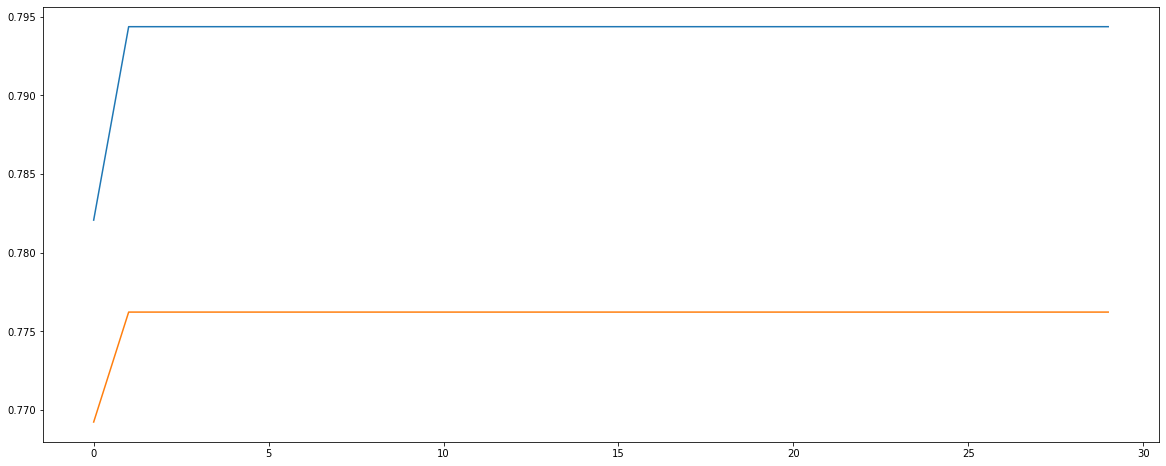

In [13]:
# Check random forest classifier accuracy by different tree depths
train = []
test = []
for i in range(1,31):
    rf = RandomForestClassifier(max_depth=i,random_state=3)
    rf.fit(X_train,y_train)
    train.append(rf.score(X_train,y_train))
    test.append(rf.score(X_test,y_test))
figure(figsize = (20, 8))
plt.plot(range(len(train)),train)
plt.plot(range(len(test)),test)

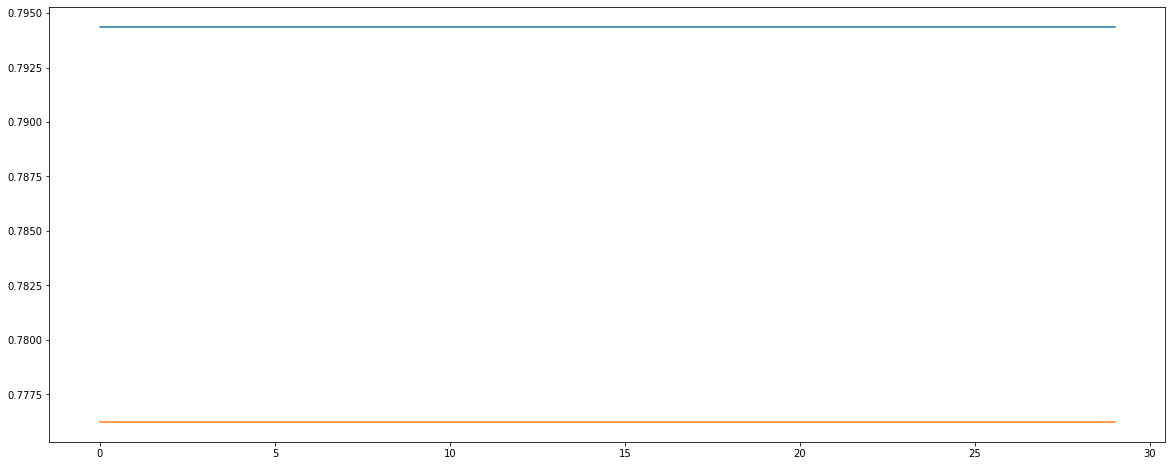

In [14]:
# Check random forest classifier accuracy by different no. estimators
train = []
test = []
for i in range(1,31):
    rf = RandomForestClassifier(n_estimators=i,random_state=3)
    rf.fit(X_train,y_train)
    train.append(rf.score(X_train,y_train))
    test.append(rf.score(X_test,y_test))
figure(figsize = (20, 8))
plt.plot(range(len(train)),train)
plt.plot(range(len(test)),test)

# Predict using logistic regression

In [29]:
# Predict Survival rate using logistic regression

X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=3)

mm = MinMaxScaler()
X_train = mm.fit_transform(X_train)
X_test = mm.fit_transform(X_test)

log = LogisticRegression()
log.fit(X_train,y_train)
print(log.score(X_train,y_train))
print(log.score(X_test,y_test)) #test prediction performance; y_pred is done internally
#y_pred = log.predict(X_test)
#print(classification_report(y_pred,y_test))
cross_val_score(log,X,y)

0.7820738137082601
0.7692307692307693


array([0.78321678, 0.81818182, 0.77464789, 0.73239437, 0.78873239])